# [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

Data about customers

## About Dataset

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

- Customer ID
- Gender
- Age
- Annual Income
- Spending Score - Score assigned by the shop, based on customer behavior and spending nature
- Profession
- Work Experience - in years
- Family Size

___

The objective of this notebook is to analyze the data and adjust a regression model to try to predict the Spending Score!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
# Drop ID as it's not relevant
df.drop(["CustomerID"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Annual Income ($)       2000 non-null   int64 
 3   Spending Score (1-100)  2000 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         2000 non-null   int64 
 6   Family Size             2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [6]:
# % of missing data
sum(df["Profession"].isnull()) / len(df)

0.0175

I'd say 1.75% is a small number. Let's remove these rows.

In [7]:
df.dropna(subset = df.columns[df.isna().sum() > 0], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1965 non-null   object
 1   Age                     1965 non-null   int64 
 2   Annual Income ($)       1965 non-null   int64 
 3   Spending Score (1-100)  1965 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         1965 non-null   int64 
 6   Family Size             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


Value counts for categorical variables.

In [9]:
df["Gender"].value_counts()

Female    1166
Male       799
Name: Gender, dtype: int64

In [10]:
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Summary statistics for numerical data.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1965.0,48.894656,28.414889,0.0,25.0,48.0,73.0,99.0
Annual Income ($),1965.0,110616.009669,45833.860195,0.0,74350.0,109759.0,149095.0,189974.0
Spending Score (1-100),1965.0,51.078880,27.977176,0.0,28.0,50.0,75.0,100.0
Work Experience,1965.0,4.092621,3.926459,0.0,1.0,3.0,7.0,17.0
Family Size,1965.0,3.757252,1.968335,1.0,2.0,4.0,5.0,9.0


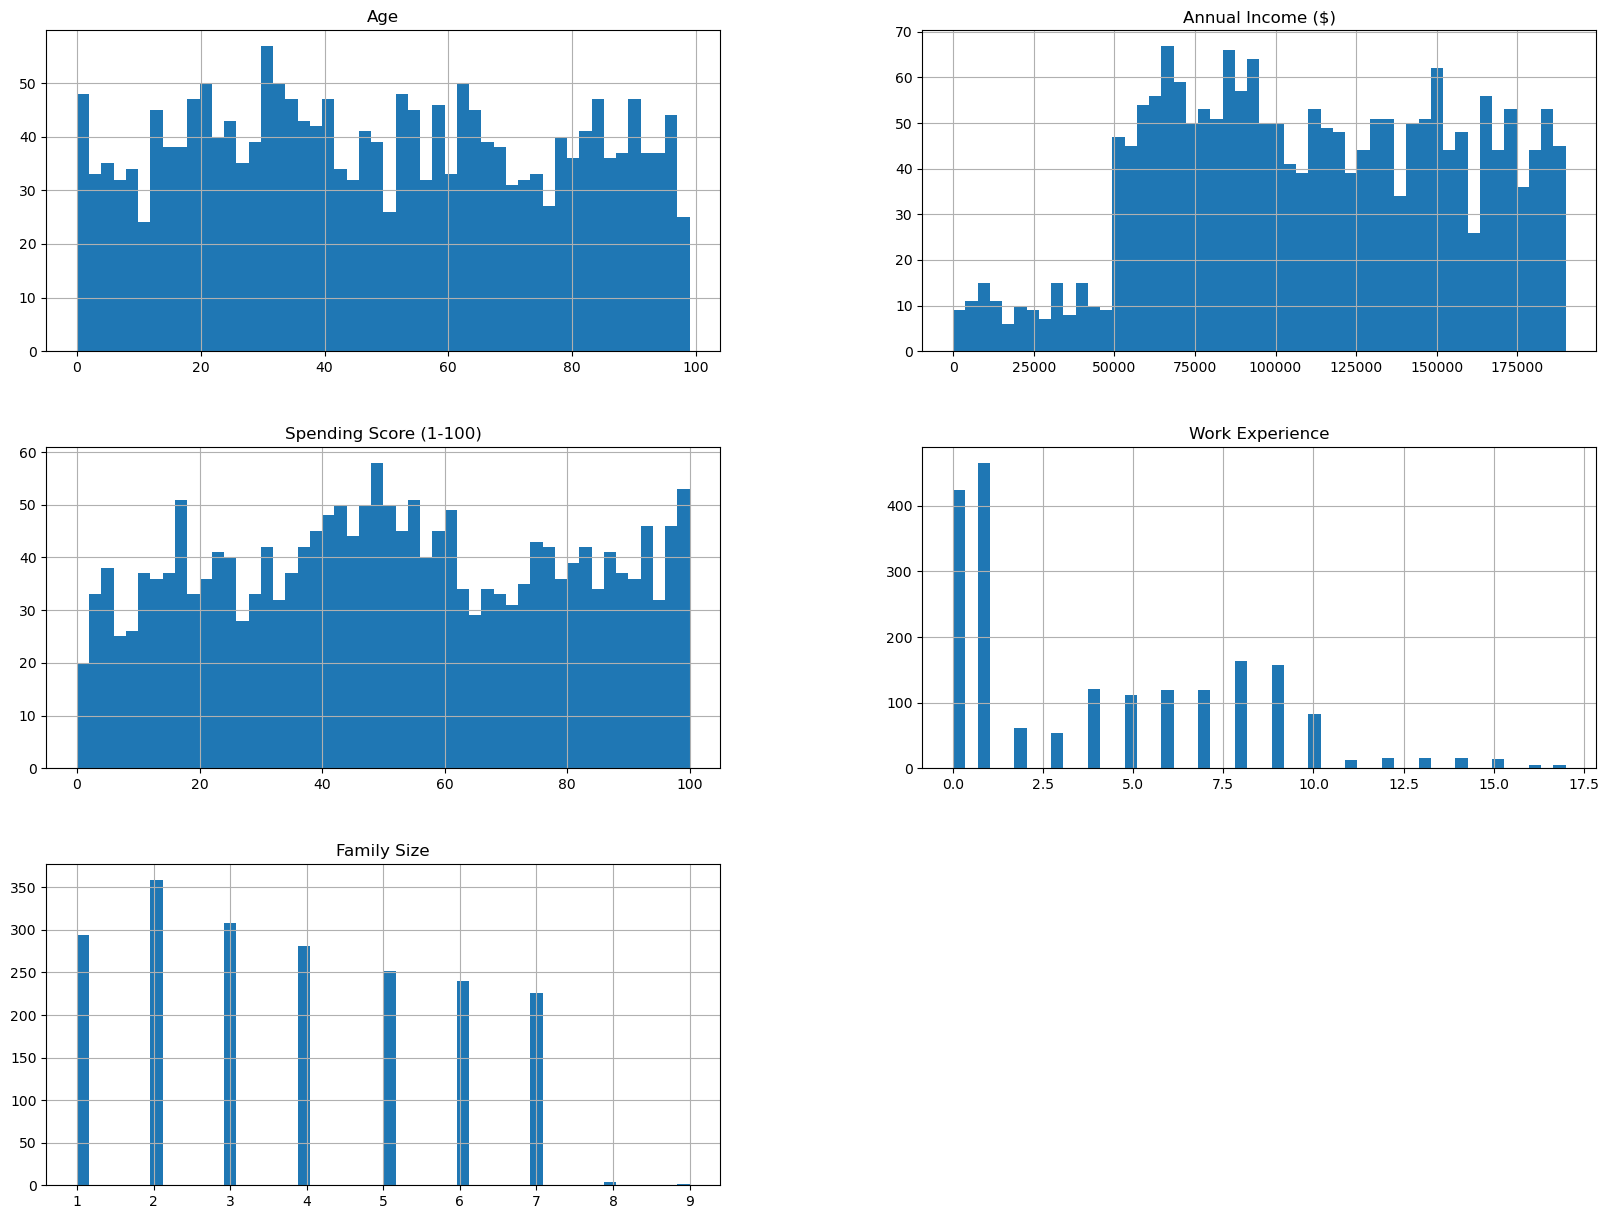

In [12]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

**!!!** It seems that `Age` has some weird values. Let's do some more exploring.

<AxesSubplot:xlabel='Family Size', ylabel='Age'>

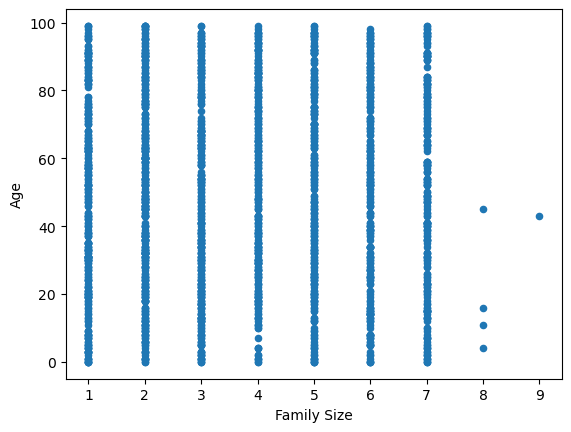

In [13]:
df.plot(kind="scatter", x="Family Size", y="Age")

<AxesSubplot:xlabel='Work Experience', ylabel='Age'>

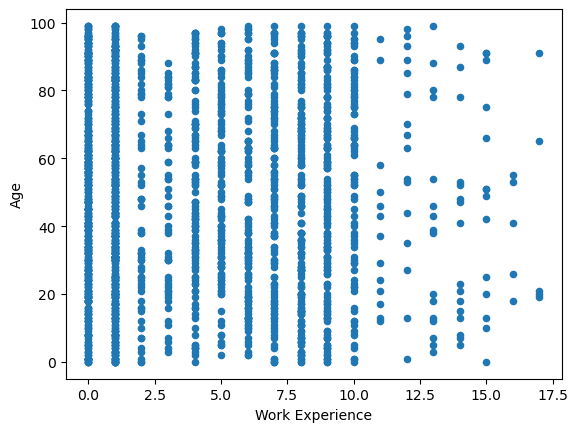

In [14]:
df.plot(kind="scatter", x="Work Experience", y="Age")

Let's correct some of these values. For instance, it's not possible to have a years of work experience greater than your age. Also, let's consider that you can't have a family size greater than your age. Making the corrections:

In [15]:
df[df["Age"] < df["Work Experience"]]

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
211,Female,0,22000,92,Artist,2,1
228,Male,0,33000,64,Marketing,1,1
230,Female,6,93000,53,Lawyer,8,2
234,Female,4,84000,54,Artist,9,1
321,Male,5,69078,60,Lawyer,13,1
...,...,...,...,...,...,...,...
1925,Female,0,105935,46,Doctor,4,5
1926,Male,3,74607,69,Healthcare,6,1
1951,Male,1,57522,75,Artist,10,5
1979,Male,0,165321,93,Doctor,8,1


In [16]:
df[df["Age"] < df["Family Size"]]

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
210,Female,1,57000,93,Engineer,1,2
211,Female,0,22000,92,Artist,2,1
228,Male,0,33000,64,Marketing,1,1
271,Female,1,12000,82,Doctor,0,3
333,Male,0,173743,96,Artist,0,4
...,...,...,...,...,...,...,...
1925,Female,0,105935,46,Doctor,4,5
1951,Male,1,57522,75,Artist,10,5
1979,Male,0,165321,93,Doctor,8,1
1984,Female,2,153622,51,Lawyer,6,6


In [17]:
df = df.drop(df[df["Age"] < df["Work Experience"]].index)
df = df.drop(df[df["Age"] < df["Family Size"]].index)

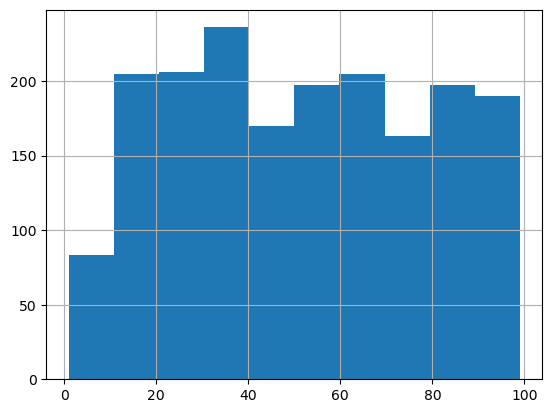

In [18]:
df["Age"].hist()
plt.show()

Better! But still regarding the age:

In [19]:
df[["Age"]].describe()

,Age
count,1852.000000
mean,51.686285
std,26.843371
min,1.000000
25%,29.000000
50%,51.500000
75%,75.000000
max,99.000000


Minimum is 1 year old. That really doesn't make sense. Let's define a threshold. Maybe 16? We might lose some 15 year old with consumption habits for instance, but I'd say that's a realistic cut.

In [20]:
df = df.drop(df[df["Age"] < 16].index)

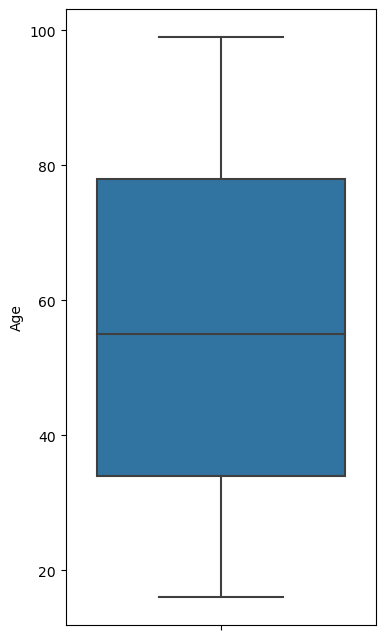

In [21]:
plt.figure(figsize = (4, 8))
sns.boxplot(y="Age", data=df)
plt.show()

___

In order to adjust a regression model, we need a target variable. Let's try to predict the Spending Score given the other variables.

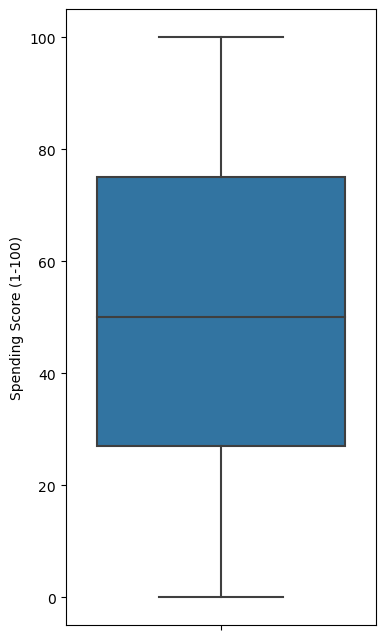

In [22]:
plt.figure(figsize = (4, 8))
sns.boxplot(y="Spending Score (1-100)", data=df)
plt.show()

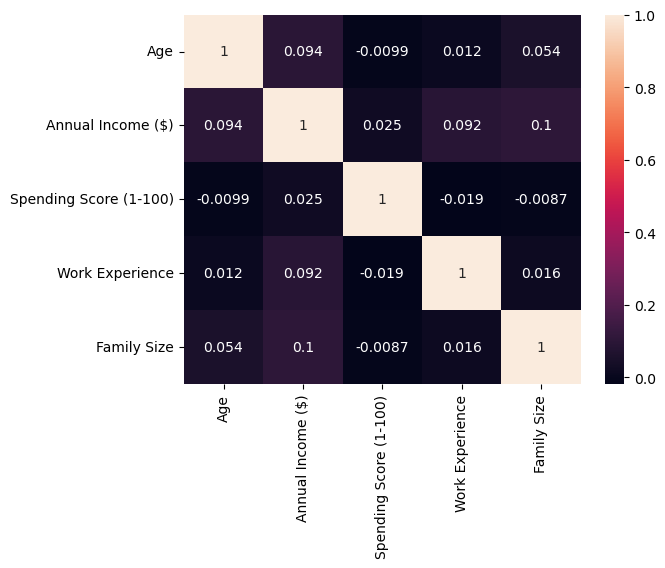

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Very very low correlations.

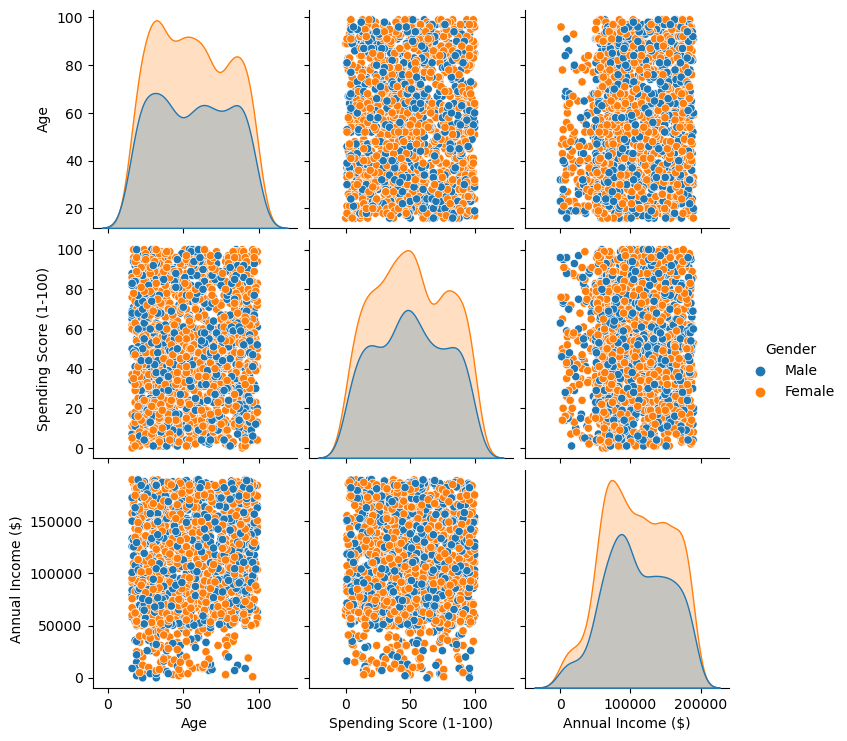

In [24]:
sns.pairplot(df[["Age", "Spending Score (1-100)", "Annual Income ($)", "Gender"]], hue="Gender")
plt.show()

We can see the orange curves are higher than the blue ones. That's because we have more `Female` values than `Male` ones:

In [25]:
df["Gender"].value_counts()

Female    996
Male      680
Name: Gender, dtype: int64

What's the distribution between the two different genders?

In [26]:
df.groupby("Gender").agg(np.mean).T

Gender,Female,Male
Age,55.998996,56.133824
Annual Income ($),109038.406627,109170.711765
Spending Score (1-100),50.751004,50.160294
Work Experience,3.947791,4.122059
Family Size,3.714859,3.798529


What if we try to create other variables? Like the income per work experience years or income per family size:

In [27]:
df["Income per Exp"] = np.where(df["Work Experience"] == 0, 
                                 df["Annual Income ($)"], 
                                 df["Annual Income ($)"] / df["Work Experience"])
df["Income per FamSize"] = np.where(df["Family Size"] == 0, 
                                     df["Annual Income ($)"], 
                                     df["Annual Income ($)"] / df["Family Size"])

In [28]:
df.corr()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Income per Exp,Income per FamSize
Age,1.000000,0.093543,-0.009862,0.011706,0.053808,0.046558,0.038855
Annual Income ($),0.093543,1.000000,0.024572,0.091511,0.103854,0.416024,0.457936
Spending Score (1-100),-0.009862,0.024572,1.000000,-0.018832,-0.008725,0.008561,-0.004674
Work Experience,0.011706,0.091511,-0.018832,1.000000,0.016029,-0.715669,0.031383
Family Size,0.053808,0.103854,-0.008725,0.016029,1.000000,0.041349,-0.653692
Income per Exp,0.046558,0.416024,0.008561,-0.715669,0.041349,1.000000,0.215410
Income per FamSize,0.038855,0.457936,-0.004674,0.031383,-0.653692,0.215410,1.000000


Still bad. Well, if that's our data, let's proceed to adjust a logistic regression model. But first, let's adjust our categorical variables so we have dummy variables.

In [29]:
dummy = pd.get_dummies(df["Gender"], drop_first=True, prefix="Gender")
df = pd.concat([df, dummy], axis=1)
df.drop(["Gender"], axis = 1, inplace = True)

In [30]:
dummy = pd.get_dummies(df["Profession"], drop_first=True, prefix="Profession")
df = pd.concat([df, dummy], axis=1)
df.drop(["Profession"], axis = 1, inplace = True)

Splitting our data.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Spending Score (1-100)"], axis=1),
                                                    df["Spending Score (1-100)"], test_size=0.2, random_state=10)

Adjusting a Decision Tree Regressor:

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
model = tree_reg.fit(X_train, y_train)

In [34]:
X_train

,Age,Annual Income ($),Work Experience,Family Size,Income per Exp,Income per FamSize,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
1658,81,171194,0,5,171194.000000,34238.800000,1,0,0,0,0,0,0,0,0
1349,33,170959,0,4,170959.000000,42739.750000,1,0,0,0,0,0,0,0,0
587,53,86766,16,3,5422.875000,28922.000000,0,0,0,0,0,0,0,1,0
192,33,96000,9,2,10666.666667,48000.000000,1,0,0,0,1,0,0,0,0
1011,80,125623,0,4,125623.000000,31405.750000,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,34,109263,0,1,109263.000000,109263.000000,1,0,0,1,0,0,0,0,0
1588,48,186445,0,1,186445.000000,186445.000000,0,0,1,0,0,0,0,0,0
604,94,85265,7,6,12180.714286,14210.833333,0,0,0,0,1,0,0,0,0
1353,88,172369,6,6,28728.166667,28728.166667,0,0,0,0,0,0,0,0,0


In [35]:
predictions = model.predict(X_test)

In [36]:
predictions[0:10]

array([75., 96.,  5.,  9., 34., 57., 92., 52., 76., 84.])

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

1540.0505952380952

In [38]:
np.sqrt(mean_squared_error(y_test, predictions))

39.243478378427355

Feature importance:

In [39]:
features = df.columns
df_import_features = dict(zip(features, model.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features.head(15)

,value
Income per Exp,0.246094
Age,0.192497
Annual Income ($),0.165214
Family Size,0.161362
Spending Score (1-100),0.066315
Work Experience,0.039023
Profession_Engineer,0.032743
Income per FamSize,0.023903
Profession_Homemaker,0.014040
Profession_Doctor,0.013366


Let's adjust a Linear Regression model so we can compare both of them:

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
model = lin_reg.fit(X_train, y_train)

In [42]:
predictions = model.predict(X_test)

In [43]:
predictions[0:10]

array([51.67708083, 51.17648133, 49.55464077, 54.77798733, 52.31991836,
       49.37992934, 53.25038937, 46.6594103 , 47.38285   , 53.03389884])

In [44]:
mean_squared_error(y_test, predictions)

762.0034711119667

In [45]:
np.sqrt(mean_squared_error(y_test, predictions))

27.604410356172558

It's better to use Linear Regression!